In [1]:
! pip install wordcloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import os
os.chdir("/content/drive/MyDrive")
with open ("TrainComments.txt","r") as f:
  file0=f.readlines()
f.close()
with open ("TestComments.txt","r") as f:
  file1=f.readlines()
f.close()

In [57]:
with open ("TrainLabels.txt","r") as f:
  file2=f.readlines()
f.close()

In [59]:
from wordcloud import WordCloud, STOPWORDS

In [60]:
my_stop_words = STOPWORDS.copy()

In [61]:
n_key_words = 700

In [62]:

def is_noun(text):
    import spacy

# Load the English model
    nlp = spacy.load("en_core_web_sm")

# Process a sentence
    doc = nlp(" ".join(text))
    noun=[]
    # Iterate through the tokens and print their text and part of speech
    for token in doc:
        if token.pos_ not in ['VERB']:
            noun.append(token.text)
    return noun

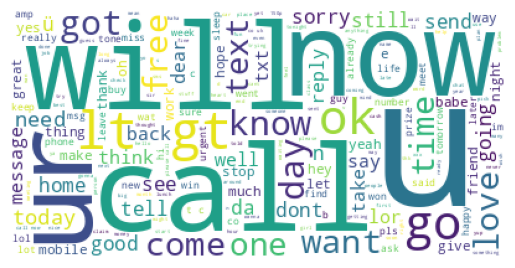

In [63]:
text = ' '.join(file0)
key_words_list = set()

wcloud = WordCloud(stopwords=my_stop_words,
                   background_color='white',
                   max_words=n_key_words).generate(text=text.lower())
key_words_list = key_words_list.union(set(wcloud.words_.keys()))
import matplotlib.pyplot as plt
plt.imshow(wcloud);
plt.axis('off');

In [64]:
key_words_list = list(is_noun(key_words_list))
len(key_words_list)

653

In [65]:
import pandas as pd
cooc = pd.DataFrame({})
cooc1 = pd.DataFrame({})
file0=pd.DataFrame(file0,columns=[0])
file1=pd.DataFrame(file1,columns=[0])
for kw in key_words_list:
    cooc[kw] = file0[0].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
    cooc1[kw] = file1[0].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)

<ipython-input-65-5d0ac5762a83>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc[kw] = file0[0].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
<ipython-input-65-5d0ac5762a83>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cooc1[kw] = file1[0].str.lower().str.find(kw).apply(lambda x: 0 if x == -1 else 1)
<ipython-input-65-5d0ac5762a83>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [66]:
cooc1

,opinion,gift,voucher,un,s,even,drug,though,u,quite,...,touch,ah,mine,yup,earlier,statement,weekend,chennai,dream,family
0,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2068,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2069,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2070,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import  VotingClassifier as vc
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB as gn
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import CategoricalNB as nb

In [68]:
file2.append("ham\n")
file2.append("ham\n")

In [69]:
X_train, X_test, y_train, y_test = train_test_split(cooc,file2,random_state=1)

In [78]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.svm import SVC as svc
fs=SelectKBest(score_func=f_classif)
clf1 = DTC(criterion='gini')

clf2 = RFC(n_estimators=400)

clf3 = ABC(estimator=DTC(criterion='gini'), n_estimators=20)

clf4 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.99)),
                       ('Classifier', DTC(criterion='gini'))])

clf5 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=0.99)),
                       ('Classifier', RFC(n_estimators=20, criterion='gini'))])

sc=svc(kernel="poly",C=0.1)
clf6 = Pipeline(steps=[('fs',fs
                        ),
                       ('Classifier', sc)])
sc=svc(kernel="poly",C=4)
sc.fit(X_train, y_train)
clf7 = Pipeline(steps=[('Dimension Reduction', PCA(n_components=1)),
                       ('Classifier', sc)])
cio= ABC(estimator=CatBoostClassifier(verbose=0, n_estimators=100),n_estimators=40)
estimator = []
sc3=svc(kernel="rbf",C=100)
sc2=svc(kernel="poly",C=100)
sc1=svc(kernel="linear")
estimator.append(('rf1c', clf1))
estimator.append(('rf2c', clf2))
estimator.append(('rfwc', sc2))
estimator.append(('rfec', sc3))
estimator.append(('rfec2', cio))
vot = vc(estimators = estimator, voting ='hard')
from sklearn.ensemble import GradientBoostingClassifier as gbr
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as kn
clfs = [clf1, clf2, clf5 , vot,sc1]
vot.fit(X_train, y_train)


VotingClassifier(estimators=[('rf1c', DecisionTreeClassifier()),
                             ('rf2c', RandomForestClassifier(n_estimators=400)),
                             ('rfwc', SVC(C=100, kernel='poly')),
                             ('rfec', SVC(C=100)),
                             ('rfec2',
                              AdaBoostClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7b51a5453850>,
                                                 n_estimators=40))])

In [79]:
print(accuracy_score(y_true=y_test, y_pred=vot.predict(X_test)))

0.9800285306704708


In [80]:
acc_list = []

for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], pd.DataFrame(file2,columns=[0])[0][train_index]
    X_test, y_test = cooc.iloc[test_index, :], pd.DataFrame(file2,columns=[0])[0][test_index]
    vot.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_true=y_test, y_pred=vot.predict(X_test)))
print(sum(acc_list)/len(acc_list))

0.9745836560016304


In [71]:
from sklearn.metrics import accuracy_score
for clf in clfs:
  clf.fit(X_train, y_train)
  print(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.954337899543379
0.976027397260274
0.9189497716894978
0.973744292237443
0.9657534246575342


In [72]:
from sklearn.naive_bayes import MultinomialNB as nb

X_train, X_test, y_train, y_test = train_test_split(cooc,file2,random_state=42)
n=nb()
n.fit(X_train, y_train)
for clf in [nb]:
  print(accuracy_score(y_true=y_test, y_pred=n.predict(X_test)))

0.980593607305936


In [73]:
acc_list = []

for i, (train_index, test_index) in enumerate(kf.split(cooc)):
    X_train, y_train = cooc.iloc[train_index, :], pd.DataFrame(file2,columns=[0])[0][train_index]
    X_test, y_test = cooc.iloc[test_index, :], pd.DataFrame(file2,columns=[0])[0][test_index]
    n.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_true=y_test, y_pred=n.predict(X_test)))
print(sum(acc_list)/len(acc_list))


0.9742971265539027


In [74]:
sc2=SVC(kernel="rbf",C=100)


X_train, X_test, y_train, y_test = train_test_split(cooc,file2,random_state=42,test_size=0.2)

sc2.fit(X_train, y_train)
y_pred = sc2.predict(X_test)
